In [9]:
# ライブラリのインポート
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 少数第三位まで表示
%precision 3

from sklearn import linear_model

In [10]:
# リンクからcsvの読み込み
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# データの確認
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# 要約統計量の表示
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# csvにローカルで保存
df.to_csv('./winequality-red.csv', index=False)


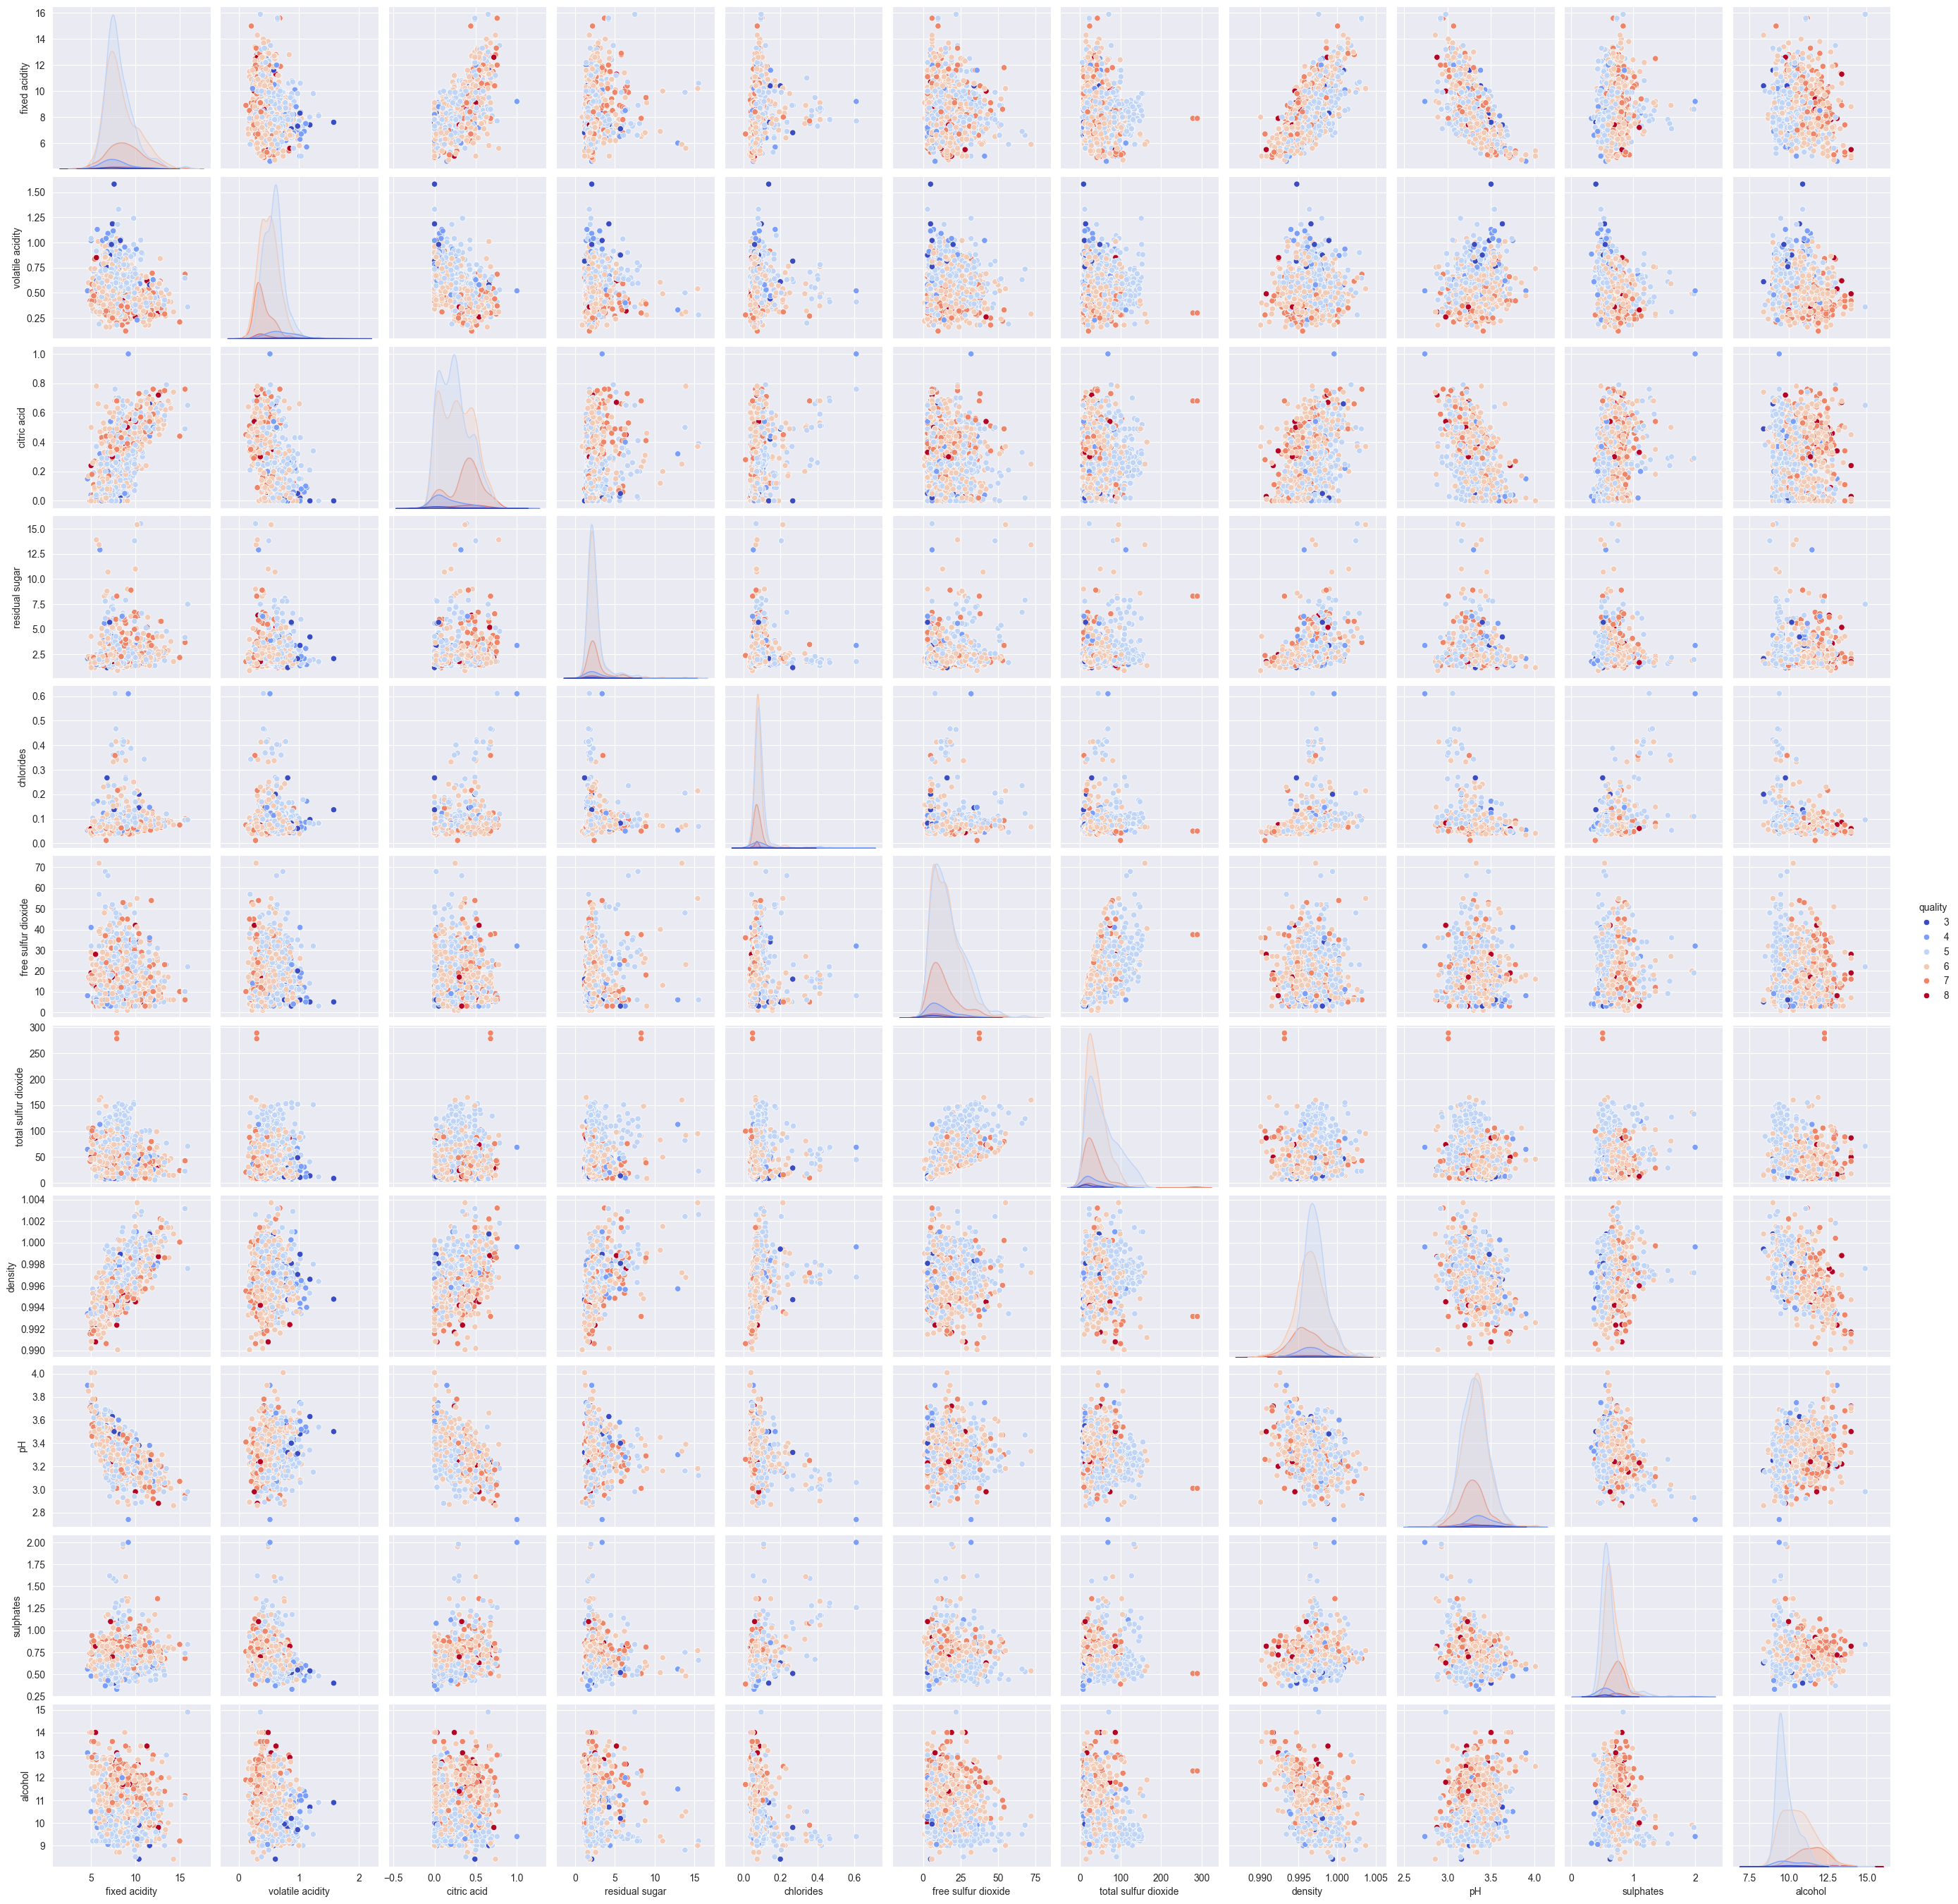

In [13]:
# 全体をグラフ化
sns.pairplot(df, hue='quality', palette='coolwarm')


In [14]:
#chatgptによる解説

"""
このグラフ（pairplot）から読み取れる主な関係性は次のようになります。

---

## 🔍 グラフから読み取れること：

### ① 全体的な傾向

* 赤い色（高品質のワイン）と青い色（低品質のワイン）が散布図上である程度分離していることから、一部の変数と品質の関係が明確に確認できます。

---

### ② 品質との関係が明確な変数の例：

* **alcohol（アルコール度数）**

  * アルコール度数が高くなるほど品質が高いワイン（赤）が増える傾向があります。
  * 品質が低いワイン（青）はアルコール度数が低めの位置に集中しています。

* **volatile acidity（揮発性酸度）**

  * 揮発性酸度が低いほど高品質ワインが増え、逆に高くなるほど品質が下がっています。

* **sulphates（硫酸塩）**

  * 硫酸塩の値が高めのワインほど、高品質のワインが多く見られます。

---

### ③ 品質との関係があまりはっきりしない変数の例：

* **residual sugar（残糖量）** や **density（密度）** などは、品質とあまり強い相関を示していません。青や赤が混ざり合って分布しています。

---

### ④ 変数間の相関（共線性）：

* いくつかの変数間に相関があります。

  * 例えば、**density** と **alcohol** は負の相関があります。
    「密度が高くなるほどアルコール度数は低くなる」傾向がはっきりしています。
  * **fixed acidity（固定酸度）** と **citric acid（クエン酸）** は弱い正の相関があります。

---

## 📌まとめ（重要な洞察）：

このペアプロットで特に明確にわかることは、

* **アルコール度数が高く、揮発性酸度が低く、硫酸塩が多いワインが高品質になりやすい**ということです。

* その他の指標は、品質との関係がそれほど明確ではありません。

こうした視覚的な分析から、機械学習モデルを作成する際には、特に上記の3つの変数（alcohol、volatile acidity、sulphates）が重要な特徴量となる可能性が高いことが推察されます。

"""

'\nこのグラフ（pairplot）から読み取れる主な関係性は次のようになります。\n\n---\n\n## 🔍 グラフから読み取れること：\n\n### ① 全体的な傾向\n\n* 赤い色（高品質のワイン）と青い色（低品質のワイン）が散布図上である程度分離していることから、一部の変数と品質の関係が明確に確認できます。\n\n---\n\n### ② 品質との関係が明確な変数の例：\n\n* **alcohol（アルコール度数）**\n\n  * アルコール度数が高くなるほど品質が高いワイン（赤）が増える傾向があります。\n  * 品質が低いワイン（青）はアルコール度数が低めの位置に集中しています。\n\n* **volatile acidity（揮発性酸度）**\n\n  * 揮発性酸度が低いほど高品質ワインが増え、逆に高くなるほど品質が下がっています。\n\n* **sulphates（硫酸塩）**\n\n  * 硫酸塩の値が高めのワインほど、高品質のワインが多く見られます。\n\n---\n\n### ③ 品質との関係があまりはっきりしない変数の例：\n\n* **residual sugar（残糖量）** や **density（密度）** などは、品質とあまり強い相関を示していません。青や赤が混ざり合って分布しています。\n\n---\n\n### ④ 変数間の相関（共線性）：\n\n* いくつかの変数間に相関があります。\n\n  * 例えば、**density** と **alcohol** は負の相関があります。\n    「密度が高くなるほどアルコール度数は低くなる」傾向がはっきりしています。\n  * **fixed acidity（固定酸度）** と **citric acid（クエン酸）** は弱い正の相関があります。\n\n---\n\n## 📌まとめ（重要な洞察）：\n\nこのペアプロットで特に明確にわかることは、\n\n* **アルコール度数が高く、揮発性酸度が低く、硫酸塩が多いワインが高品質になりやすい**ということです。\n\n* その他の指標は、品質との関係がそれほど明確ではありません。\n\nこうした視覚的な分析から、機械学習モデルを作成する際には、特に上記の3つの変数（alcohol、volatile acidity、sulp